<center><b>Ecole Polytechnique, Cycle Ingénieur (2A)<b></center>
<center>MAP471A - Problem solving en mathématiques appliquées</center>
<center>Enseignants : Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(mail)</a> 
    Teddy Pichard	<a href="mailto:teddy.pichard@polytechnique.edu">(mail)</a>
        </center>


In [142]:
# css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()

In [143]:
# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
import random
import pandas as pd
%matplotlib inline  

<a id="Prelim"></a>
# Aléatoire 1 : Apprentissage par renforcement

## Table des matières

- [1. Le problème du bandit](#bandit)
- [2. Apprentissage markovien : Pierre-Feuilles-Ciseaux](#PFC)
   * [L'algorithme d'apprentissage](#Apprentissage)
   * [1 joueur apprend](#Apprend_iid)
   * [2 joueurs apprennent](#Apprend_apprend)

L'objectif de ce TP est d'étudier de façon expérimentale deux problèmes simples qui se traitent naturellement par <i>Apprentissage par renforcement</i>. 

<a id="bandit"></a>
# 1. Le problème du bandit

Considérons le problème suivant : un annonceur a le choix d'afficher sur une page web une publicité choisie parmi $\{A,B\}$, l'annonceur est payé au clic et l'objectif est d'afficher la publicité la plus attractive.

On modélise le problème de la façon suivante : chaque utilisateur se comporte de façon indépendante des autres et clique sur la publicité $A$ (resp. $B$) avec probabilité $p_A$ (resp. $p_B$), on suppose que $p_A,p_B$ sont inconnues.

On note $E_i\in \{A,B\}$ la publicité affichée sur le site lorsque le $i$-ème client se connecte.
On pose $X_i=1$ si le $i$-ème client clique, $0$ sinon. On a donc
$$
X_i\sim \mathrm{Bernoulli}(p_{E_i}).
$$
La stratégie $E_i$ à l'instant $i$ est une fonction (éventuellement aléatoire) de $(E_1,X_1),\dots,(E_{i-1},X_{i-1})$.
On cherche à définir une stratégie efficace pour l'annonceur, c'est-à-dire qu'asymptotiquement on propose la meilleure publicité :
$$
\frac{X_1+\dots +X_n}{n} \stackrel{n\to +\infty}{\to} \max\{p_A,p_B\}
$$
(convergence presque-sûre ou en probabilité). Encore mieux : on souhaite maximiser les gains moyens à horizon fini
$$
\max_{(E_i)_i\text{ stratégies }}\mathbb{E}[X_1+\dots +X_n].
$$



### Une méthode sous-optimale : la $\varepsilon$-exploration
Considérons la stratégie suivante :
- On fixe un paramètre $\varepsilon>0$ "petit".
- On choisit $E_1=A,E_2=B$.
- Pour $i\geq 3$, on note $M_i$ la publicité qui a eu le meilleur "taux de clic" jusque-là (en cas d'ex-aequo entre $A,B$ on se donne une règle arbitraire)
   * Avec proba $1-\varepsilon$, on prend $E_i=M_i$,
   * Avec proba $\varepsilon$ on prend $E_i=\mathrm{non}(M_i)$.

<i>(<b>Vocabulaire :</b> On considère qu'avec probabilité $\varepsilon$ on "explore", alors qu'avec probabilité $1-\varepsilon$ on "exploite".)</i>



<div markdown=1 class="DoIt"> 

1. Intuitivement, quelle est la limite de $(X_1+\dots +X_n)/n$ ? Asymptotiquement (en $n$), quel semble être le meilleur choix pour $\varepsilon$?
2. On fixe $n=5000$, $p_A=0.4$, $p_B=0.6$, $\varepsilon=0.001$. Tracer 10 trajectoires du processus
$$
i\in \{1,\dots,n\} \mapsto \frac{1}{i}\left( X_1+\dots +X_i\right).
$$
Est-ce que les courbes sont compatibles avec votre intuition de la question précédente?

3. Pour $n=100$,  $p_A=0.4$, $p_B=0.6$, déterminer par simulation la valeur de $\varepsilon$ qui optimise $\mathbb{E}\left[X_1+\dots +X_n\right]$. (Prendre $10000$ simulations pour chaque valeur de $\varepsilon$.)

<div markdown=1 class="Answers"> 

1. Ça tend presque surement a $(1-\epsilon)max(p_A,p_B) + \epsilon min(p_A,p_B)$
2. 
3. 


In [144]:
# Question 2
p=[0.6, 0.4]
pA=p[0]
pB=p[1]
S=10 # Nombre de simulations
N=5000 # Durée d'une simulation

# Rappel : 
# np.random.rand()<p renvoie une Bernoulli de moyenne p

epsilon = 1e-3

def met_non_optimale(p, S, N, epsilon):
    X = []
    #Xsum = np.array([])
    Xsum = []
    for j in range(S):
        Xbar = []
        Na = 0
        Nb = 0
        if np.random.rand() < pA: 
            Na+=1
        Xbar.append((Na+Nb))
        if np.random.rand() < pB: 
            Nb+=1
        Xbar.append((Na+Nb)/2)
        for i in range(3,N):
            if Na > Nb:
                if np.random.rand() < epsilon:
                    p = pB
                    if np.random.rand() < p:
                        Nb+=1
                else:
                    p = pA
                    if np.random.rand() < p:
                        Na+=1
            if Na < Nb:
                if np.random.rand() < epsilon:
                    p = pA
                    if np.random.rand() < p:
                        Na+=1
                else:
                    p = pB
                    if np.random.rand() < p:
                        Nb+=1
            if Na == Nb:
                if np.random.rand() < pA:
                    Na+=1
                else:
                    Nb+=1
            Xbar.append((Na+Nb)/i)
        X.append(Xbar)
        #print(Xsum)
        Xsum.append(Na+Nb)
    return X, Xsum

In [145]:
Q2, _ = met_non_optimale(p,S,N,epsilon)

In [146]:
_

[2998, 2960, 1995, 2963, 3024, 2977, 2050, 3024, 2068, 3062]

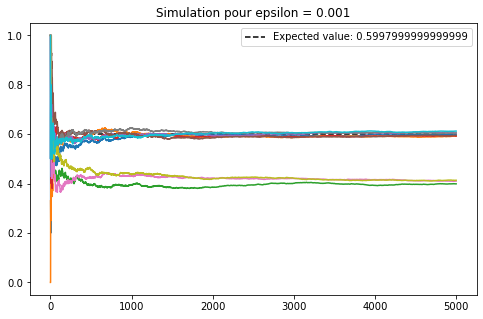

In [147]:
plt.figure(figsize=(8,5))
plt.title(f"Simulation pour epsilon = {epsilon}")
for x in Q2:
    plt.plot(x)
    
plt.hlines(
    np.max(p) * (1-epsilon) + np.min(p) * (epsilon),
    0,
    N,
    colors= "black",
    linestyles= "dashed",
    label = f"Expected value: {np.max(p) * (1-epsilon) + np.min(p) * (epsilon)}"
)

plt.legend()
plt.show()

In [148]:
# Question 3 : 
p=[0.6, 0.4]
pA=p[0]
pB=p[1]
S=10000 # Nombre de simulations
N=100 # Durée d'une simulation
ValeursEpsilon=np.arange(0.05,0.20,0.015)

In [154]:
def find_epsilon_optimal(list_epsilon):
    Xsumbar = {}
    for epsilon in list_epsilon:
        _, Q3 = met_non_optimale(p,S,N,epsilon)
        Q3 = np.array(Q3)
        Xsumbar[epsilon] = np.mean(Q3)
    return Xsumbar

In [157]:
Xsumbar = find_epsilon_optimal(ValeursEpsilon)

{0.05: 52.418,
 0.065: 52.302,
 0.08: 52.569,
 0.095: 52.3871,
 0.11: 52.4153,
 0.125: 52.4657,
 0.14: 52.3651,
 0.155: 52.4669,
 0.16999999999999998: 52.28,
 0.185: 52.3413,
 0.2: 52.2905}

<AxesSubplot:>

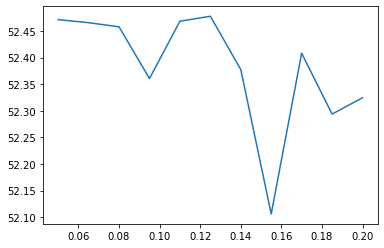

In [158]:
pd.Series(Xsumbar).plot()

## Une stratégie asymptotiquement optimale?

On fait maintenant varier la probabilité d'exploration. L'algorithme est le même que précédemment sauf qu'on remplace $\varepsilon$ par une suite
 $(\varepsilon_i)_{i\geq 3}$ d'éléments de $(0,1)$. On pourra essayer
-  $\varepsilon_i=1/i^2$
-  $\varepsilon_i=1/\sqrt{i}$
-  $\varepsilon_i=1/\log{i}$

<div markdown=1 class="DoIt"> 

Q1. On fixe à nouveau $n=1000$, $p_A=0.4$, $p_B=0.6$. Pour les exemples des 3 suites ci-dessus, tracer quelques trajectoires de courbes
$$
i\in \{1,\dots,n\} \mapsto \frac{1}{i}\left( X_1+\dots +X_i\right).
$$ 

In [163]:
####################################
# Question 1
def met_optimale_1(p, S, N, list_epsilon):
    X = []
    #Xsum = np.array([])
    Xsum = []
    for j in range(S):
        Xbar = []
        Na = 0
        Nb = 0
        if np.random.rand() < pA: 
            Na+=1
        Xbar.append((Na+Nb))
        if np.random.rand() < pB: 
            Nb+=1
        Xbar.append((Na+Nb)/2)
        for i in range(3,N):
            epsilon = list_epsilon[i]
            if Na > Nb:
                if np.random.rand() < epsilon:
                    p = pB
                    if np.random.rand() < p:
                        Nb+=1
                else:
                    p = pA
                    if np.random.rand() < p:
                        Na+=1
            if Na < Nb:
                if np.random.rand() < epsilon:
                    p = pA
                    if np.random.rand() < p:
                        Na+=1
                else:
                    p = pB
                    if np.random.rand() < p:
                        Nb+=1
            if Na == Nb:
                if np.random.rand() < pA:
                    Na+=1
                else:
                    Nb+=1
            Xbar.append((Na+Nb)/i)
        X.append(Xbar)
        #print(Xsum)
        Xsum.append(Na+Nb)
    return X, Xsum

In [176]:
p=[0.6, 0.4]
pA=p[0]
pB=p[1]
S=10 # Nombre de simulations
N=1000 # Durée d'une simulation
ValeursEpsilon1 = []

for i in range(1,N+1):
    ValeursEpsilon1.append(1/(i*i))

In [177]:
Q1_1, _ = met_optimale_1(p, S, N, ValeursEpsilon1)

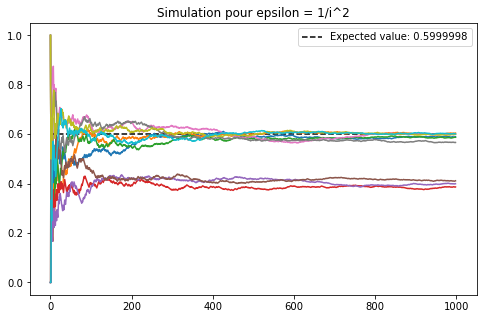

In [178]:
plt.figure(figsize=(8,5))
plt.title("Simulation pour epsilon = 1/i^2")
for x in Q1_1:
    plt.plot(x)
    
plt.hlines(
    np.max(p) * (1-ValeursEpsilon1[-1]) + np.min(p) * (ValeursEpsilon1[-1]),
    0,
    N,
    colors= "black",
    linestyles= "dashed",
    label = f"Expected value: {np.max(p) * (1-ValeursEpsilon1[-1]) + np.min(p) * (ValeursEpsilon1[-1])}"
)

plt.legend()
plt.show()

In [179]:
ValeursEpsilon2 = []

for i in range(1,N+1):
    ValeursEpsilon2.append(1/np.sqrt(i))

In [180]:
Q1_2, _ = met_optimale_1(p, S, N, ValeursEpsilon2)

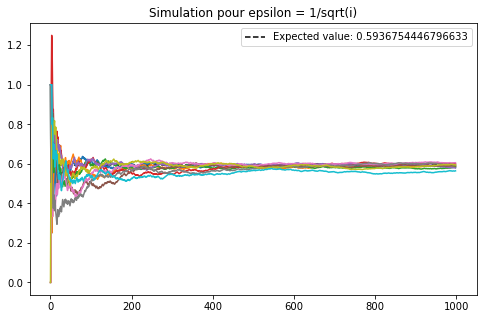

In [183]:
plt.figure(figsize=(8,5))
plt.title("Simulation pour epsilon = 1/sqrt(i)")
for x in Q1_2:
    plt.plot(x)
    
plt.hlines(
    np.max(p) * (1-ValeursEpsilon2[-1]) + np.min(p) * (ValeursEpsilon2[-1]),
    0,
    N,
    colors= "black",
    linestyles= "dashed",
    label = f"Expected value: {np.max(p) * (1-ValeursEpsilon2[-1]) + np.min(p) * (ValeursEpsilon2[-1])}"
)

plt.legend()
plt.show()

In [184]:
ValeursEpsilon3 = []

for i in range(1,N+1):
    ValeursEpsilon3.append(1/np.log(i))

<ipython-input-184-9939642d541a>:4: RuntimeWarning: divide by zero encountered in scalar divide
  ValeursEpsilon3.append(1/np.log(i))


In [185]:
Q1_3, _ = met_optimale_1(p, S, N, ValeursEpsilon1)

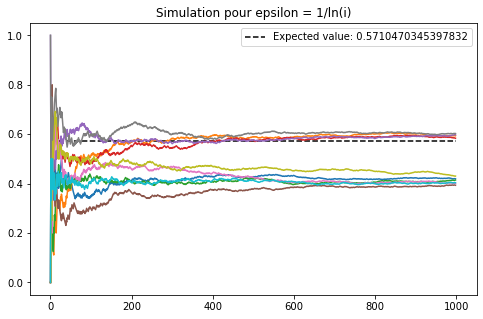

In [186]:
plt.figure(figsize=(8,5))
plt.title("Simulation pour epsilon = 1/ln(i)")
for x in Q1_3:
    plt.plot(x)
    
plt.hlines(
    np.max(p) * (1-ValeursEpsilon3[-1]) + np.min(p) * (ValeursEpsilon3[-1]),
    0,
    N,
    colors= "black",
    linestyles= "dashed",
    label = f"Expected value: {np.max(p) * (1-ValeursEpsilon3[-1]) + np.min(p) * (ValeursEpsilon3[-1])}"
)

plt.legend()
plt.show()

<div markdown=1 class="DoIt"> 

Q2. Que doit vérifier la suite $(\varepsilon_i)$ pour que l'on ait
$$
\frac{X_1+\dots +X_n}{n} \stackrel{n\to +\infty}{\to} \max\{p_A,p_B\}?
$$

<div markdown=1 class="Answers"> 

2. On doit avoir une suite qui tend vers 0 ($\varepsilon_n \rarr  0$) et $\sum \varepsilon_i = \infty $



<a id="PFC"></a>
# 2. Apprentissage markovien : Pierre-Feuille-Ciseaux

## Préliminaires et notations

On considère $2$ joueurs $X,Y$ qui jouent à <i>Pierre-Feuille-Ciseaux</i>. Pour $t\geq 1$ on note $X_t\in \{\text{Pi,Fe,Ci}\}$ le choix du joueur à l'instant $t$ et $Y_t$ le choix de son adversaire.

On appelera `Historique` la liste 
$$
[[X_1,Y_1],[X_2,Y_2],\dots, [X_T,Y_T]]
$$
des choix des joueurs jusqu'à l'instant actuel.

Dans la présentation on représentera aussi `Historique` schématiquement de la façon suivante :
<img src="figures/ListeHistorique.jpg" style="width:450px;"/>
désigne également la liste
$$
[[\mathrm{Pi},\mathrm{Fe}],[\mathrm{Ci},\mathrm{Fe}],\dots, [\mathrm{Pi},\mathrm{Fe}]]
$$
avec $T=7$.


On suppose que l'adversaire fait ses choix suivant une mémoire "courte" et une source d'aléa :
* $Y_1,Y_2$ sont arbitraires.
* pour tout $t\geq 2$, 
$$
Y_{t+1}=\phi\left(X_{t-1},X_t,Y_{t-1},Y_t,A_{t+1}\right),
$$
où
  * $\phi$ est une fonction déterministe $\{\text{Pi,Fe,Ci}\}^4\times[0,1] \to \{\text{Pi,Fe,Ci}\}$
  * $(A_t)$ est une suite de variables i.i.d. uniformes dans $[0,1]$.

Par exemple, la stratégie (assez efficace...) consistant à toujours tirer uniformément au hasard (indépendamment des choix précédents) correspond à
$$
\phi(X_{t-1},X_t,Y_{t-1},Y_t,A_{t+1}) = \mathrm{Pi}\times \mathbf{1}_{A_{t+1}<1/3}
+ \mathrm{Fe}\times \mathbf{1}_{1/3<A_{t+1}21/3} + \mathrm{Ci}\times \mathbf{1}_{2/3 < A_{t+1}}.
$$
alors que la stratégie (idiote) consistant à jouer ce que l'adversaire vient de jouer est
$$
\phi(X_{t-1},X_t,Y_{t-1},Y_t,A_{t+1}) = X_t.
$$


### Réponse à une stratégie

On introduit donc une fonction $(p,q,r)\mapsto \verb|ReponseStrategie|(p,q,r)\in [0,1]^3$ de la façon suivante :
<br><br>
$$
\verb|ReponseStrategie|(p,q,r)=\mathrm{argmax}_{(x,y,z)} \mathbb{E}[\text{Gain pour }X \text{ si $X$ tire selon } (x,y,z)\text{ et }Y\text{ tire selon }(p,q,r)].
$$
<br>
<i>(Dans cette espérance on considère qu'un victoire vaut $1$ et une défaite $-1$.)</i><br><br>

<br>
Par exemple, vous pouvez vérifier que si $(p,q,r)=(0.01,0,0.99)$ alors cela signifie que $Y$ va jouer `Ci` presque à tous les coups et donc $X$ joue `Pi` : 
$$
\verb|ReponseStrategie|(0.01,0,0.99)=(1,0,0).
$$

<div markdown=1 class="DoIt"> 

Que vaut la fonction `ReponseStrategie()`? <i>(Indication : les calculs sont assez simples.)</i><br>
Implémenter la fonction `ReponseStrategie()`.

<div markdown=1 class="Answers"> 

On a que l'esperance du gain de X si X joue $(x,y,z)$ et Y joue $(p, q, r)$ est donnée par:

$$
\mathbb{E}[\text{Gain pour }X] = x(r-q) + y(p-r) + z(p-q)
$$
où $x+y+z = 1$, $p+q+r = 1$ et $x,y,z,p,q,r$ sont tous supérieurs ou égaux à zero.

Soit M = max{(r-q),(p-r),(q-p)}. Alors la reponse optimale est:

$$
(x,y,z) = (\mathbf{1}_{r-q=M}, \mathbf{1}_{p-r=M}, \mathbf{1}_{q-p=M})
$$

In [187]:
def ReponseStrategie(p,q,r):
    R = []
    M = np.max(r-q,p-r,q-p)
    if r-q == M:
        R = [1,0,0]
    if p-r == M:
        R = [0,1,0]
    if q-p == M:
        R = [0,0,1]
    return R

<center>
    <font size=+3 color='red'>!! La partie obligatoire (à rendre sur Moodle) s'arrête ici !!</font>
</center>

Pour commencer à coder une stratégie d'apprentissage on définit une fonction `Stats` qui en fonction d'un historique `Historique` donné et de `PasseRecent`=$[[X_{t-1},X_t],[Y_{t-1},Y_t]]$  renvoie le nombre de fois où le joueur $i$ ($i=0$ correspond au joueur $X$) a joué `'Pi'`, `'Fe'` ou `'Ci'`.

Par exemple, avec l'exemple précédent pour `Historique` et
```python
TestHistorique=[['Pi','Fe'],['Ci','Fe'],['Pi','Ci'],['Fe','Pi'],['Ci','Fe'],['Pi','Ci'],['Pi','Fe']]
TestPasse=[['Ci','Fe'],['Pi','Ci']]
```
on doit obtenir
```python
Stats(TestHistorique,TestPasse,1)
>[1, 1, 0]
```
car dans la situation de ce passé récent le joueur $1$ a joué $1$ fois `Pi` et une fois `Fe` :
<img src="figures/ListeHistorique_AvecPasseRecent.jpg" style="width:450px;"/>

<div markdown=1 class="DoIt"> 

Implémenter la fonction `Stats`.

<a id="Apprentissage"></a>

## L'algorithme d'apprentissage

On considère la stratégie suivante. Pour un paramètre $\varepsilon >0$ (petit),
* Si $t=1,2,3$ on tire au hasard uniformément entre Pi,Fe,Ci.
* Pour $t\geq 4$
    -  <b>avec probabilité $1-\varepsilon$ on "exploite"</b> : on renvoie $\verb|ReponseStrategie|(p,q,r)$ calculée sur les stats de $Y$ dans l'historique. Plus précisément
          * En notant $(X_{t-2}=x_{t-2},X_{t-1}=x_{t-1})$ et $(Y_{t-2}=y_{t-2},Y_{t-1}=y_{t-1})$, on regarde toutes les fois où $Y$ s'est retrouvé dans la situation $(X_{s-2}=x_{t-2},X_{s-1}=x_{t-1})$ et $(Y_{s-2}=y_{t-2},Y_{s-1}=y_{t-1})$. On calcule alors les fréquences $\hat{p},\hat{q},\hat{r}$ avec lesquelles $Y$ a joué Pi-Fe-Ci.
          * On renvoie $\verb|ReponseStrategie|(\hat{p},\hat{q},\hat{r})$
    - <b>avec probabilité $\varepsilon$ on "explore"</b> : on tire au sort uniformément au hasard entre Pi,Fe,Ci.

### Tirages indépendants

<div markdown=1 class="DoIt"> 

Ecrire une fonction `TiragePiFeCi(p,q,r)` qui renvoie Pi,Fe,Ci avec les probabilités $p,q,r$.

<div markdown=1 class="DoIt"> 

Ecrire une fonction
```python
JoueurApprentissage(Historique,eps)
```
qui en fonction de l'historique et du paramètre $\varepsilon$ renvoie le coup de $X$ suivant l'algorithme d'apprentissage ci-dessus.


<a id="Apprend_iid"></a>
## $X$ apprend / $Y$ joue i.i.d.

On va jouer une partie de longueur $T$ entre $X$ (qui apprend) et $Y$ (qui joue de façon indé.)

<div markdown=1 class="DoIt"> 

Faire jouer $X$ selon l'algorithme d'apprentissage face à $Y$ qui joue des coups i.i.d. de probabilités $(0.6,0.2,0.2)$. Tracer l'évolution des proportions des coups joués par $X$.

<a id="Apprend_apprend"></a>
## $X$ apprend / $Y$ apprend

<div markdown=1 class="DoIt"> 

Faire jouer $X$ et $Y$ m'un contre l'autre,  chacun suivant selon l'algorithme d'apprentissage. Tracer l'évolution des proportions des coups joués par $X$.